<a href="https://colab.research.google.com/github/sid0312/10DaysMLChallenge/blob/master/catsvsdogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip
  
import os
import zipfile

try:
  %tensorflow_version 1.x
except:
  pass
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator

--2020-03-27 15:16:39--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c07::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   137MB/s    in 0.5s    

2020-03-27 15:16:40 (137 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Dense,Flatten

Using TensorFlow backend.


In [4]:
model = Sequential()
model.add(Conv2D(64,(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(256,(3,3),activation='relu',padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [5]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 74, 74, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 128)      

In [6]:
from keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(150,150),batch_size=20,class_mode='binary')



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if logs.get('val_acc')>=0.90:
      print("\nReached 90% validation accuracy so cancelling training!")
      self.model.stop_training=True

callbacks=myCallback()

In [8]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=120,validation_data=validation_generator,validation_steps=100,callbacks=[callbacks])




Epoch 1/120





100/100 [==============================] - 25s 250ms/step - loss: 0.6940 - acc: 0.5065 - val_loss: 0.6920 - val_acc: 0.5150
Epoch 2/120
100/100 [==============================] - 21s 211ms/step - loss: 0.6923 - acc: 0.5125 - val_loss: 0.6899 - val_acc: 0.5000
Epoch 3/120
100/100 [==============================] - 21s 211ms/step - loss: 0.6855 - acc: 0.5435 - val_loss: 0.6668 - val_acc: 0.5860
Epoch 4/120
100/100 [==============================] - 21s 213ms/step - loss: 0.6760 - acc: 0.5750 - val_loss: 0.6612 - val_acc: 0.6220
Epoch 5/120
100/100 [==============================] - 21s 212ms/step - loss: 0.6651 - acc: 0.6095 - val_loss: 0.6580 - val_acc: 0.6080
Epoch 6/120
100/100 [==============================] - 21s 212ms/step - loss: 0.6581 - acc: 0.6115 - val_loss: 0.6355 - val_acc: 0.6560
Epoch 7/120
100/100 [==============================] - 21s 212ms/step - loss: 0.6522 - acc: 0.6290 - val_loss: 0.6386 - val_acc: 0.6260
Epoch 8/120
100/100 [===================

In [0]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

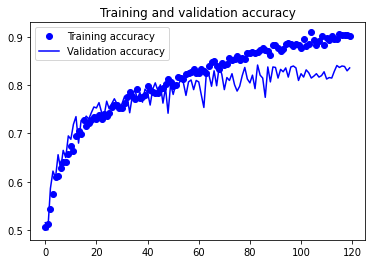

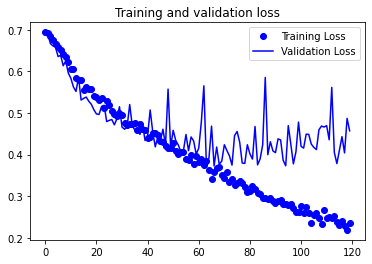

In [10]:
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [0]:
model.save('mymodel.h5')

In [0]:
from tensorflow import keras

In [13]:
model_new = keras.models.load_model('mymodel.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
